In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

In [174]:
covid_cases_by_day = pd.read_csv('cases-by-day.csv')
cases_by_boro = pd.read_csv("by-boro.csv")
rent_prices = pd.read_csv('medianAskingRent_All.csv')
rent_prices.rename(columns={"Attribute" : "Date", "Value" : "Median_Rent"}, inplace=True)
census_data = pd.read_csv('nyc_census_data.csv')

In [22]:
rent_prices.tail()

,areaName,Borough,areaType,Date,Median_Rent
17292,Woodstock,Bronx,neighborhood,2021-03,1375
17293,Woodstock,Bronx,neighborhood,2021-04,1700
17294,Woodstock,Bronx,neighborhood,2021-06,1800
17295,Woodstock,Bronx,neighborhood,2021-07,1900
17296,Woodstock,Bronx,neighborhood,2021-08,1800


In [ ]:
##Graph to look at all covid cases in NYC since the start of Covid

dates_to_plot =covid_cases_by_day['date_of_interest']
covid_cases_to_plot = covid_cases_by_day['CASE_COUNT_7DAY_AVG']

sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(dates_to_plot, covid_cases_to_plot)

In [ ]:
## Separate the data out by Borough 

boro_to_plot = covid_cases_by_day[["date_of_interest","BK_CASE_COUNT_7DAY_AVG","MN_CASE_COUNT_7DAY_AVG", 'QN_CASE_COUNT_7DAY_AVG',
'SI_CASE_COUNT_7DAY_AVG', 'BX_ALL_CASE_COUNT_7DAY_AVG' ]]
boro_to_plot.head()

#Melt the dataframe -- this is making the column headers of the different boroughs row values instead
boro_to_plot = boro_to_plot.melt('date_of_interest', var_name='Boroughs' , value_name='Covid Case Count 7 Day Avg')

##Graph the above values
sns.set(rc = {'figure.figsize':(15,8)})
g = sns.lineplot(x='date_of_interest', y='Covid Case Count 7 Day Avg', hue = 'Boroughs' , data = boro_to_plot)


In [ ]:
rent_prices.head()
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(rent_prices['Date'], rent_prices['Median_Rent'])

In [146]:
rent_prices.head()

,areaName,Borough,areaType,Date,Median_Rent
0,All Downtown,Manhattan,submarket,2010-01,3200
1,All Downtown,Manhattan,submarket,2010-02,3200
2,All Downtown,Manhattan,submarket,2010-03,3025
3,All Downtown,Manhattan,submarket,2010-04,3100
4,All Downtown,Manhattan,submarket,2010-05,3100


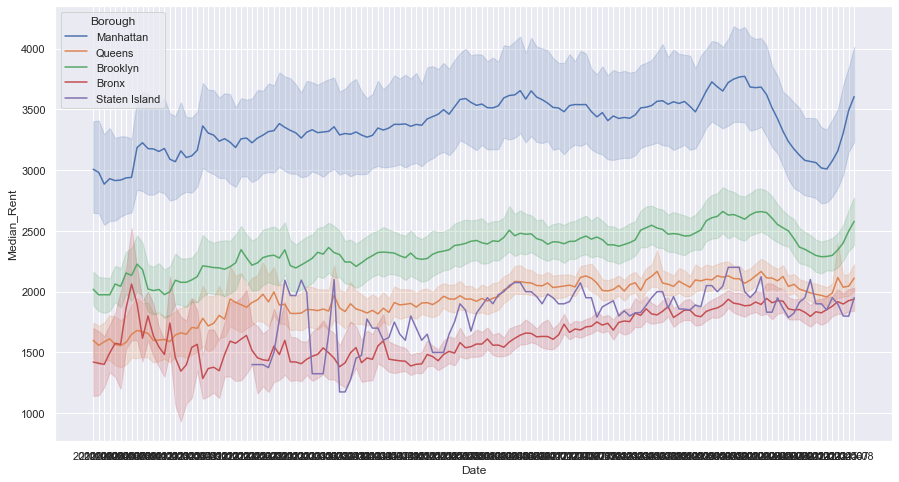

In [136]:
##Graph covid cases borough
median_rents_by_boro = rent_prices[['Date', 'Borough' , 'Median_Rent']]

# sns.set(rc = {'figure.figsize':(15,8)})
# g = sns.lineplot(median_rents_by_boro['Date'] , median_rents_by_boro['Median_Rent'])
g = sns.lineplot(x='Date', y='Median_Rent', hue = 'Borough' , data = median_rents_by_boro)


In [151]:
## Create categories based on different timeframes of the Covid outbreak 

rent_prices.head()
rents_over_time = rent_prices[(rent_prices['Date'] == '2020-03') | (rent_prices['Date'] == '2020-01') | (rent_prices['Date'] == '2021-08') | (rent_prices['Date'] == '2021-01')]
rents_over_time.loc[rents_over_time['Date'] == '2020-01', 'covid_timeline'] = "Pre-Covid"
rents_over_time.loc[rents_over_time['Date'] == '2021-08', 'covid_timeline'] = "Current"
rents_over_time.loc[rents_over_time['Date'] == '2020-03', 'covid_timeline'] = "Covid Start"
rents_over_time.loc[rents_over_time['Date'] == '2021-01', 'covid_timeline'] = "Peak Covid"



C:\Users\jackc\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\jackc\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [152]:
rents_over_time.head()


rents_over_time.loc[rents_over_time['covid_timeline'] == 'Pre-Covid', 'sort'] = 0
rents_over_time.loc[rents_over_time['covid_timeline'] == 'Covid Start', 'sort'] = 1
rents_over_time.loc[rents_over_time['covid_timeline'] == 'Peak Covid', 'sort'] = 2
rents_over_time.loc[rents_over_time['covid_timeline'] == 'Current', 'sort'] = 3
rents_over_time = rents_over_time.groupby(["Borough" , "covid_timeline", 'sort']).agg(np.average)
rents_over_time = rents_over_time.sort_values(by = ["sort"]).reset_index()



rents_over_time

,Borough,covid_timeline,sort,Median_Rent
0,Staten Island,Pre-Covid,0.0,1952.000000
1,Queens,Pre-Covid,0.0,2093.882353
2,Bronx,Pre-Covid,0.0,1887.625000
3,Manhattan,Pre-Covid,0.0,3683.432432
4,Brooklyn,Pre-Covid,0.0,2631.326087
5,Staten Island,Covid Start,1.0,2123.000000
6,Queens,Covid Start,1.0,2166.133333
7,Manhattan,Covid Start,1.0,3683.135135
8,Bronx,Covid Start,1.0,1894.500000
9,Brooklyn,Covid Start,1.0,2658.500000


<AxesSubplot:xlabel='Borough', ylabel='Median_Rent'>

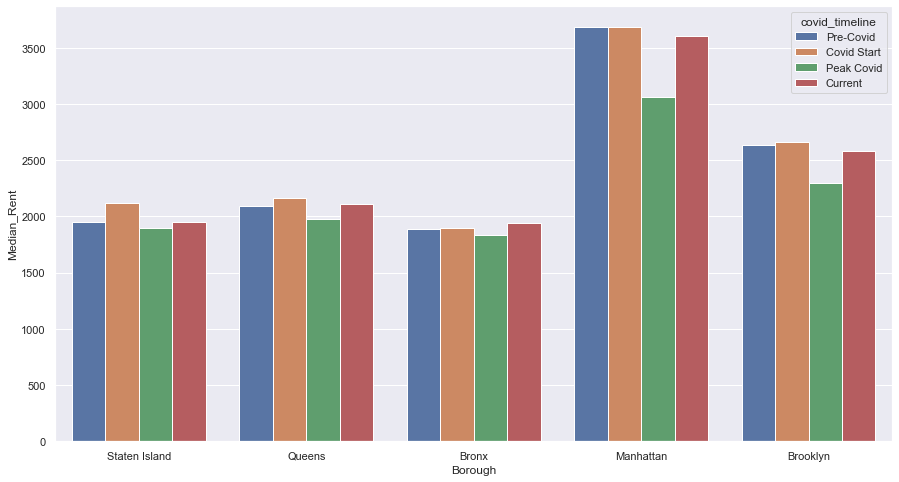

In [153]:
sns.barplot(
    x = 'Borough',
    y = "Median_Rent",
    hue='covid_timeline',
    data = rents_over_time
)

<AxesSubplot:xlabel='Borough', ylabel='Peak Covid Rents vs. Pre-Covid Rents (as %)'>

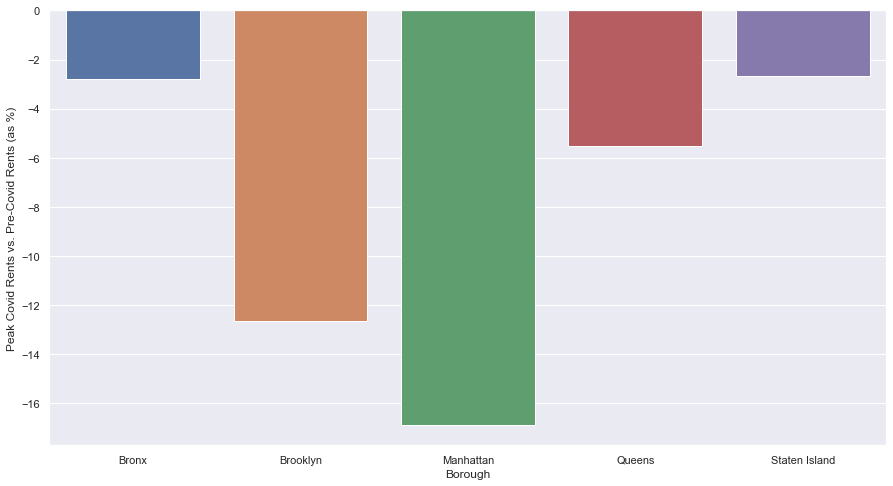

In [173]:
## Calculate the percent changes by borough of pre-covid rates vs peak and current 

changes = rents_over_time.pivot_table('Median_Rent', ['Borough'], 'covid_timeline').reset_index()
changes['Peak Covid Rents vs. Pre-Covid Rents (as %)'] = ((changes['Peak Covid']- changes['Pre-Covid'])/changes['Pre-Covid'])*100

sns.barplot(
    x = 'Borough',
    y = 'Peak Covid Rents vs. Pre-Covid Rents (as %)',
    data = changes
)